In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_data.txt",sep=':::',names=['title', 'genre', 'description'],engine="python")
df_test = pd.read_csv("test_data.txt",sep=':::',names=['id', 'title', 'description'],engine="python")

In [3]:
df.head(5)

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
df.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [5]:
df.dtypes

title          object
genre          object
description    object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
categories= df['genre'].unique()
categories

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [35]:
values= df['genre'].value_counts()
values

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

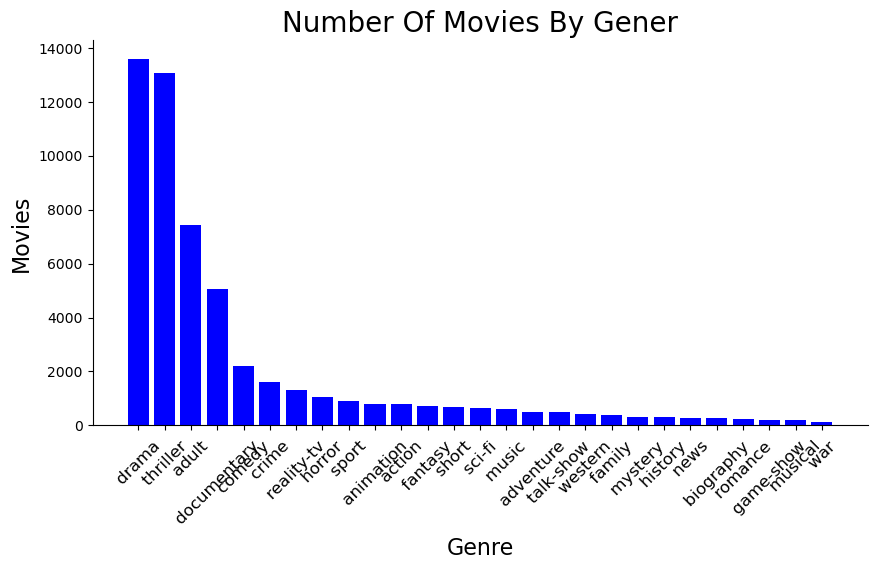

In [32]:
plt.figure(figsize=(10,5))
colors = [ 'blue']
plt.bar(categories,values,color=colors)
plt.tick_params(axis='x', labelsize=12, rotation=45)
plt.title('Number Of Movies By Gener',fontsize=20)
plt.ylabel('Movies',fontsize=16)
plt.xlabel('Genre',fontsize=16)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

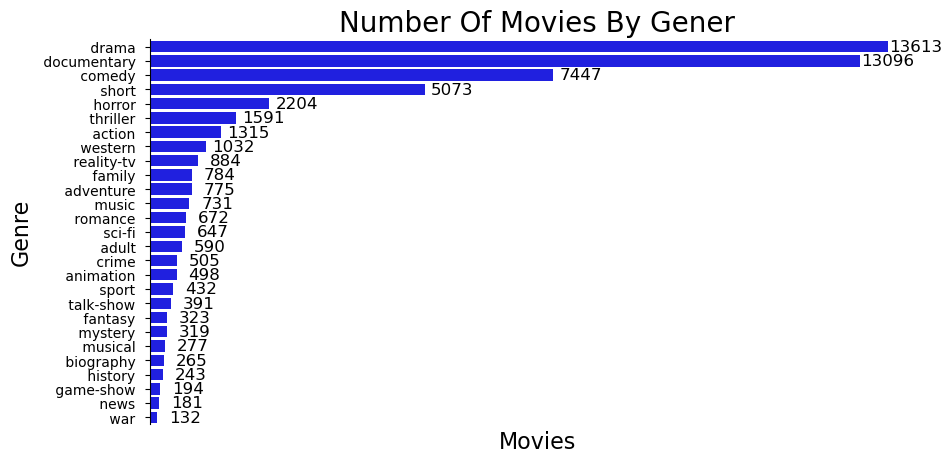

In [33]:
plt.figure(figsize=(10, 5))
colors = [ 'blue']
sns.countplot(data= df, y='genre', order= df['genre'].value_counts().index,color= colors[0])
plt.title('Number Of Movies By Gener',fontsize=20)
plt.ylabel('Genre',fontsize=16)
plt.xlabel('Movies',fontsize=16)
ax = plt.gca()
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(20, 0), textcoords='offset points')
plt.show()

In [11]:
df.columns

Index(['title', 'genre', 'description'], dtype='object')

In [12]:
import re 
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def text_cleaner(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '',text)
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']",' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text 

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\DELL\AppData\Local\Temp\ipykernel_15780\2463373792.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
print(nltk.data.path)

['C:\\Users\\DELL/nltk_data', 'C:\\Users\\DELL\\anaconda3\\nltk_data', 'C:\\Users\\DELL\\anaconda3\\share\\nltk_data', 'C:\\Users\\DELL\\anaconda3\\lib\\nltk_data', 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [15]:
df['Description_cleand'] = df['description'].apply(text_cleaner)
df_test['Desciption_cleaned_test'] = df_test['description'].apply(text_cleaner)

In [16]:
df['Description_len'] = df['description'].apply(len)
df['Description_cleand_len'] = df['Description_cleand'].apply(len)

In [17]:
df

,title,genre,description,Description_cleand,Description_len,Description_cleand_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...,546,381
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,650,402
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,1082,744
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,625,414
...,...,...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,shortlived nbc live sitcom centered bonino wor...,507,335
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...,781,562
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt standup comedy growing facing fea...,255,122
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...,642,403


In [18]:
df_test

,id,title,description,Desciption_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


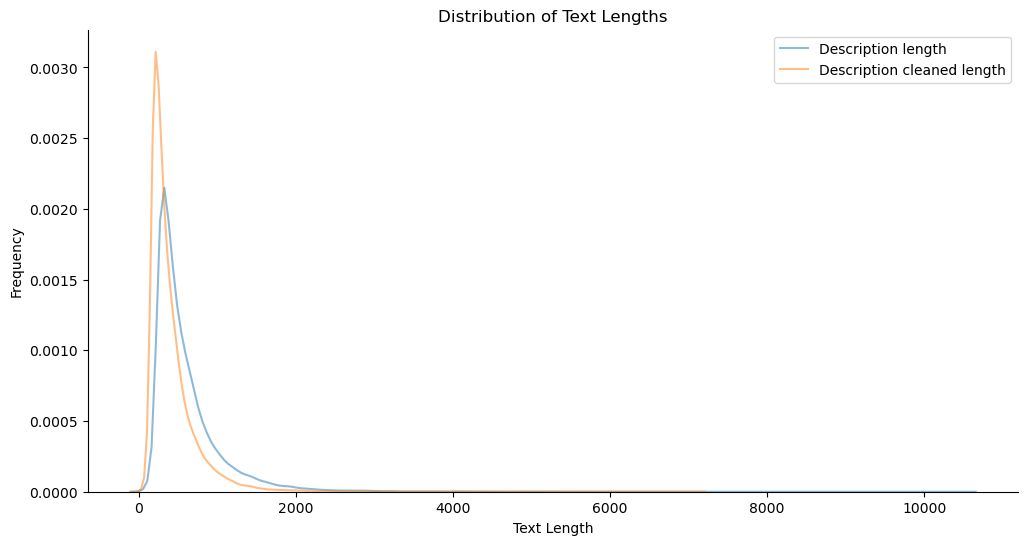

In [19]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Description_len'], label='Description length',alpha=0.5)
sns.kdeplot(df['Description_cleand_len'], label='Description cleaned length',alpha=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()

In [20]:
tfidf_vectorizer = TfidfVectorizer()
X_trian = tfidf_vectorizer.fit_transform(df['Description_cleand'])
X_test = tfidf_vectorizer.transform(df_test['Desciption_cleaned_test'])

In [21]:
print('shape_train : ', X_trian.shape)
print('shape_test : ', X_test.shape)

shape_train :  (54214, 144455)
shape_test :  (54200, 144455)


In [22]:
X = X_trian
y = df['genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.44563312736327587


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.69      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
X_test_predictions = classifier.predict(X_test)
df_test['Predicted_Genre'] = X_test_predictions

In [24]:
df_test

,id,title,description,Desciption_cleaned_test,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama
...,...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...,drama
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...,drama
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...,drama
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...,drama
